In [451]:
import os
import pandas as pd
import numpy as np

In [2]:
# import data
data = pd.read_csv("sickness_table.csv")

# change column names
data.rename(
    columns={"date": "Date", 
             "n_sick": "number_of_drivers_on_duty_that_called_in_sick", 
             "calls": "number_of_emergency_calls", 
             "n_duty": "number_of_drivers_on_duty_available", 
             "n_sby": "number_of_standby_resources_available",
             "sby_need": "number_of_standbys_activated",
             "dafted": "number_of_additional_drivers_needed_due_to_not_enough_standbys"},
    inplace=True,
)

# drop Unnamed column
data.drop(data.filter(regex="Unnamed"),axis=1, inplace=True)

In [3]:
data.head()

,Date,number_of_drivers_on_duty_that_called_in_sick,number_of_emergency_calls,number_of_drivers_on_duty_available,number_of_standby_resources_available,number_of_standbys_activated,number_of_additional_drivers_needed_due_to_not_enough_standbys
0,2016-04-01,73,8154.0,1700,90,4.0,0.0
1,2016-04-02,64,8526.0,1700,90,70.0,0.0
2,2016-04-03,68,8088.0,1700,90,0.0,0.0
3,2016-04-04,71,7044.0,1700,90,0.0,0.0
4,2016-04-05,63,7236.0,1700,90,0.0,0.0


In [4]:
# set date as index
data.index = pd.to_datetime(data['Date'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1152 entries, 2016-04-01 to 2019-05-27
Data columns (total 7 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Date                                                            1152 non-null   object 
 1   number_of_drivers_on_duty_that_called_in_sick                   1152 non-null   int64  
 2   number_of_emergency_calls                                       1152 non-null   float64
 3   number_of_drivers_on_duty_available                             1152 non-null   int64  
 4   number_of_standby_resources_available                           1152 non-null   int64  
 5   number_of_standbys_activated                                    1152 non-null   float64
 6   number_of_additional_drivers_needed_due_to_not_enough_standbys  1152 non-null   float64
dtypes: float64(3), int64(3), object(1)

In [6]:
data.head()

,Date,number_of_drivers_on_duty_that_called_in_sick,number_of_emergency_calls,number_of_drivers_on_duty_available,number_of_standby_resources_available,number_of_standbys_activated,number_of_additional_drivers_needed_due_to_not_enough_standbys
Date,,,,,,,
2016-04-01,2016-04-01,73,8154.0,1700,90,4.0,0.0
2016-04-02,2016-04-02,64,8526.0,1700,90,70.0,0.0
2016-04-03,2016-04-03,68,8088.0,1700,90,0.0,0.0
2016-04-04,2016-04-04,71,7044.0,1700,90,0.0,0.0
2016-04-05,2016-04-05,63,7236.0,1700,90,0.0,0.0


In [7]:
#data['number_of_drivers_on_duty_available'].plot(label='On-duty Drivers Available')
#data['number_of_drivers_on_duty_that_called_in_sick'].plot(label='On-duty Drivers Sick')
#data['number_of_emergency_calls'].plot(label='Emergency Calls')
#data['number_of_standby_resources_available'].plot(label='Standby Drivers Available')
#data['number_of_standbys_activated'].plot(label='Standby Drivers Activated')
#data['number_of_additional_drivers_needed_due_to_not_enough_standbys'].plot(label='Additional Drivers Due to Unsufficient Standby Drivers')
#plt.legend()
#plt.title('On-duty Drivers Available vs Those That Called in Sick')
#plt.ylabel('Count')

Text(0, 0.5, 'Count')

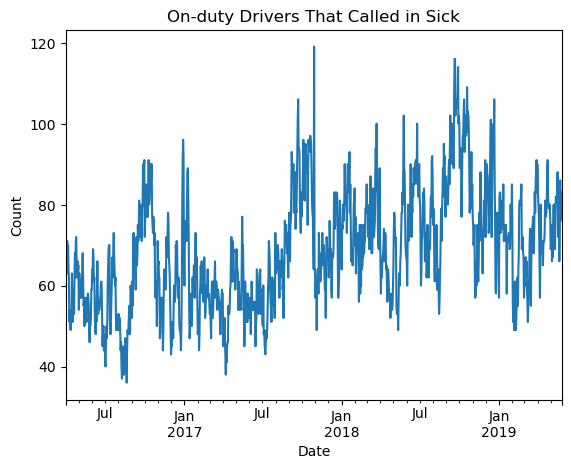

In [8]:
data['number_of_drivers_on_duty_that_called_in_sick'].plot()
plt.title('On-duty Drivers That Called in Sick')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

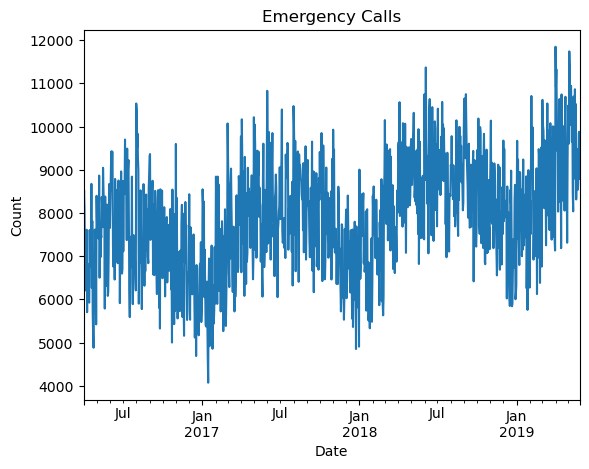

In [9]:
data['number_of_emergency_calls'].plot()
plt.title('Emergency Calls')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

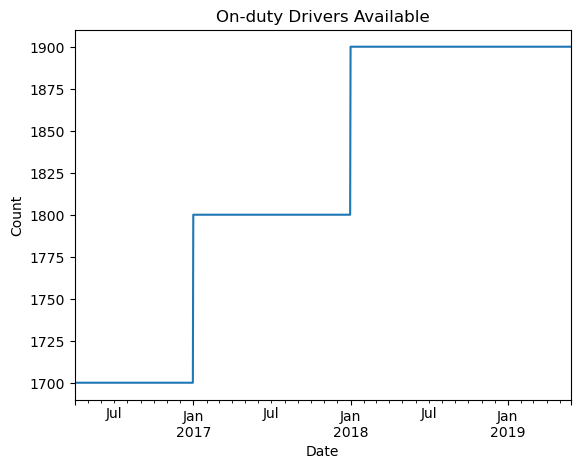

In [10]:
data['number_of_drivers_on_duty_available'].plot()
plt.title('On-duty Drivers Available')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

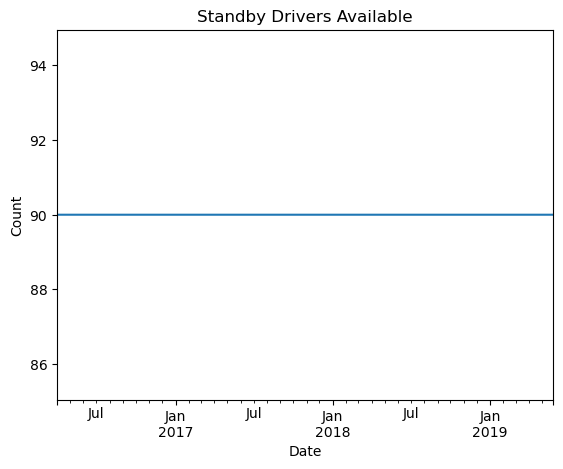

In [11]:
data['number_of_standby_resources_available'].plot()
plt.title('Standby Drivers Available')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

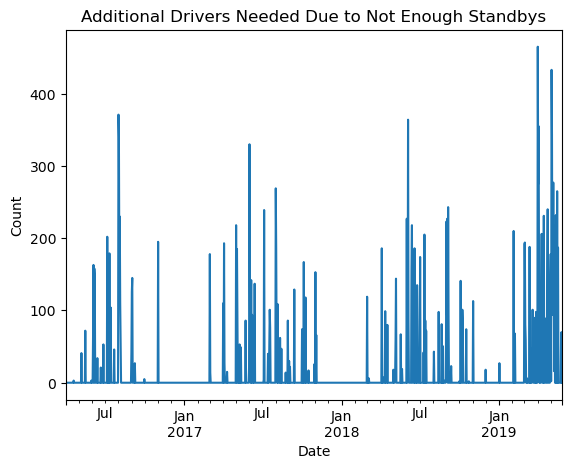

In [12]:
data['number_of_additional_drivers_needed_due_to_not_enough_standbys'].plot()
plt.title('Additional Drivers Needed Due to Not Enough Standbys')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

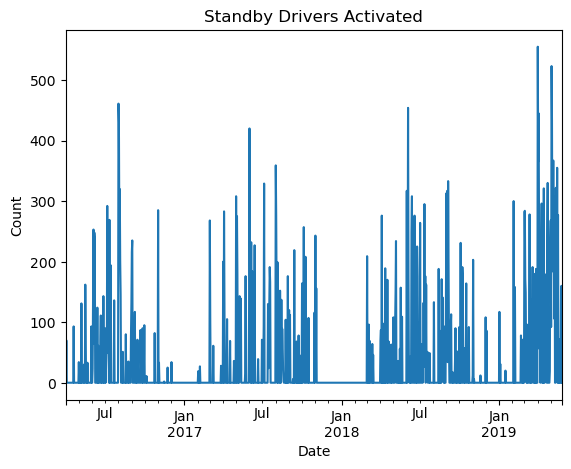

In [13]:
data['number_of_standbys_activated'].plot()
plt.title('Standby Drivers Activated')
plt.ylabel('Count')

# Extract the variables to be used in time series analysis

In [14]:
# Assuming your existing DataFrame is named 'data'
df_ts = data.iloc[:, 1:4].copy()
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1152 entries, 2016-04-01 to 2019-05-27
Data columns (total 3 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   number_of_drivers_on_duty_that_called_in_sick  1152 non-null   int64  
 1   number_of_emergency_calls                      1152 non-null   float64
 2   number_of_drivers_on_duty_available            1152 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 36.0 KB


In [15]:
df_ts.head()

,number_of_drivers_on_duty_that_called_in_sick,number_of_emergency_calls,number_of_drivers_on_duty_available
Date,,,
2016-04-01,73,8154.0,1700
2016-04-02,64,8526.0,1700
2016-04-03,68,8088.0,1700
2016-04-04,71,7044.0,1700
2016-04-05,63,7236.0,1700


In [16]:
df_ts['Seconds'] = df_ts.index.map(pd.Timestamp.timestamp)
df_ts

,number_of_drivers_on_duty_that_called_in_sick,number_of_emergency_calls,number_of_drivers_on_duty_available,Seconds
Date,,,,
2016-04-01,73,8154.0,1700,1.459469e+09
2016-04-02,64,8526.0,1700,1.459555e+09
2016-04-03,68,8088.0,1700,1.459642e+09
2016-04-04,71,7044.0,1700,1.459728e+09
2016-04-05,63,7236.0,1700,1.459814e+09
...,...,...,...,...
2019-05-23,86,8544.0,1900,1.558570e+09
2019-05-24,81,8814.0,1900,1.558656e+09
2019-05-25,76,9846.0,1900,1.558742e+09


In [17]:
day = 60*60*24
year = 365.2425*day

df_ts['Day sin'] = np.sin(df_ts['Seconds'] * (2* np.pi / day))
df_ts['Day cos'] = np.cos(df_ts['Seconds'] * (2 * np.pi / day))
df_ts['Year sin'] = np.sin(df_ts['Seconds'] * (2 * np.pi / year))
df_ts['Year cos'] = np.cos(df_ts['Seconds'] * (2 * np.pi / year))
df_ts.head()

,number_of_drivers_on_duty_that_called_in_sick,number_of_emergency_calls,number_of_drivers_on_duty_available,Seconds,Day sin,Day cos,Year sin,Year cos
Date,,,,,,,,
2016-04-01,73,8154.0,1700,1.459469e+09,-3.142587e-12,1.0,0.999968,0.008010
2016-04-02,64,8526.0,1700,1.459555e+09,1.155952e-12,1.0,0.999958,-0.009193
2016-04-03,68,8088.0,1700,1.459642e+09,-9.097425e-12,1.0,0.999652,-0.026392
2016-04-04,71,7044.0,1700,1.459728e+09,-4.798886e-12,1.0,0.999050,-0.043584
2016-04-05,63,7236.0,1700,1.459814e+09,-5.003477e-13,1.0,0.998152,-0.060764


In [18]:
df_sick_drivers = df_ts.drop(['Seconds',
                              'number_of_emergency_calls',
                              'number_of_drivers_on_duty_available'], axis=1)
df_calls = df_ts.drop(['Seconds',
                       'number_of_drivers_on_duty_that_called_in_sick',
                       'number_of_drivers_on_duty_available'], axis=1)
df_drivers_available = df_ts.drop(['Seconds',
                                   'number_of_drivers_on_duty_that_called_in_sick',
                                   'number_of_emergency_calls'], axis=1)

In [19]:
df_sick_drivers.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1152 entries, 2016-04-01 to 2019-05-27
Data columns (total 5 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   number_of_drivers_on_duty_that_called_in_sick  1152 non-null   int64  
 1   Day sin                                        1152 non-null   float64
 2   Day cos                                        1152 non-null   float64
 3   Year sin                                       1152 non-null   float64
 4   Year cos                                       1152 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 54.0 KB


In [20]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1152 entries, 2016-04-01 to 2019-05-27
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   number_of_emergency_calls  1152 non-null   float64
 1   Day sin                    1152 non-null   float64
 2   Day cos                    1152 non-null   float64
 3   Year sin                   1152 non-null   float64
 4   Year cos                   1152 non-null   float64
dtypes: float64(5)
memory usage: 54.0 KB


In [21]:
df_drivers_available.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1152 entries, 2016-04-01 to 2019-05-27
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   number_of_drivers_on_duty_available  1152 non-null   int64  
 1   Day sin                              1152 non-null   float64
 2   Day cos                              1152 non-null   float64
 3   Year sin                             1152 non-null   float64
 4   Year cos                             1152 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 54.0 KB


In [22]:
def df_to_X_y(df, window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0]]
    y.append(label)
  return np.array(X), np.array(y)

# Predicting the number of sick drivers

In [208]:
WINDOW_SIZE = 7
X1, y1 = df_to_X_y(df_sick_drivers, WINDOW_SIZE)
X1.shape, y1.shape

((1145, 7, 5), (1145, 1))

In [209]:
X_train1, y_train1 = X1[:916], y1[:916]
X_val1, y_val1 = X1[916:1031], y1[916:1031]
X_test1, y_test1 = X1[1031:], y1[1031:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((916, 7, 5), (916, 1), (115, 7, 5), (115, 1), (114, 7, 5), (114, 1))

In [213]:
model = Sequential()
model.add(InputLayer((7, 5)))
model.add(Conv1D(32, kernel_size=2))
model.add(Flatten())
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_29 (Conv1D)          (None, 6, 32)             352       
                                                                 
 flatten_29 (Flatten)        (None, 192)               0         
                                                                 
 dense_58 (Dense)            (None, 8)                 1544      
                                                                 
 dense_59 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1905 (7.44 KB)
Trainable params: 1905 (7.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [214]:
cp = ModelCheckpoint('model/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [215]:
model.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=30, callbacks=[cp])

Epoch 1/30
17/29 [================>.............] - ETA: 0s - loss: 384.7790 - root_mean_squared_error: 19.6158  INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


29/29 [==============================] - 2s 42ms/step - loss: 276.9131 - root_mean_squared_error: 16.6407 - val_loss: 107.2030 - val_root_mean_squared_error: 10.3539
Epoch 2/30
22/29 [=====================>........] - ETA: 0s - loss: 88.0544 - root_mean_squared_error: 9.3837INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


29/29 [==============================] - 1s 47ms/step - loss: 83.6575 - root_mean_squared_error: 9.1464 - val_loss: 90.8061 - val_root_mean_squared_error: 9.5292
Epoch 3/30
29/29 [==============================] - ETA: 0s - loss: 71.7341 - root_mean_squared_error: 8.4696INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


29/29 [==============================] - 1s 40ms/step - loss: 71.7341 - root_mean_squared_error: 8.4696 - val_loss: 86.7858 - val_root_mean_squared_error: 9.3159
Epoch 4/30
27/29 [==========================>...] - ETA: 0s - loss: 66.7707 - root_mean_squared_error: 8.1713INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


29/29 [==============================] - 1s 42ms/step - loss: 67.5772 - root_mean_squared_error: 8.2205 - val_loss: 83.3741 - val_root_mean_squared_error: 9.1309
Epoch 5/30
20/29 [===================>..........] - ETA: 0s - loss: 71.1472 - root_mean_squared_error: 8.4349INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


29/29 [==============================] - 1s 46ms/step - loss: 65.0464 - root_mean_squared_error: 8.0651 - val_loss: 80.8602 - val_root_mean_squared_error: 8.9922
Epoch 6/30
24/29 [=======================>......] - ETA: 0s - loss: 61.3031 - root_mean_squared_error: 7.8296INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


29/29 [==============================] - 1s 52ms/step - loss: 62.0310 - root_mean_squared_error: 7.8760 - val_loss: 76.9231 - val_root_mean_squared_error: 8.7706
Epoch 7/30
26/29 [=========================>....] - ETA: 0s - loss: 57.8044 - root_mean_squared_error: 7.6029INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


29/29 [==============================] - 1s 47ms/step - loss: 58.3750 - root_mean_squared_error: 7.6404 - val_loss: 73.7669 - val_root_mean_squared_error: 8.5888
Epoch 8/30
23/29 [======================>.......] - ETA: 0s - loss: 54.3326 - root_mean_squared_error: 7.3711INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


29/29 [==============================] - 1s 49ms/step - loss: 56.6059 - root_mean_squared_error: 7.5237 - val_loss: 71.4678 - val_root_mean_squared_error: 8.4539
Epoch 9/30
21/29 [====================>.........] - ETA: 0s - loss: 57.2381 - root_mean_squared_error: 7.5656INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


29/29 [==============================] - 1s 46ms/step - loss: 53.8272 - root_mean_squared_error: 7.3367 - val_loss: 68.9699 - val_root_mean_squared_error: 8.3048
Epoch 10/30
28/29 [===========================>..] - ETA: 0s - loss: 52.0349 - root_mean_squared_error: 7.2135INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


29/29 [==============================] - 1s 42ms/step - loss: 52.1756 - root_mean_squared_error: 7.2233 - val_loss: 68.8021 - val_root_mean_squared_error: 8.2947
Epoch 11/30
29/29 [==============================] - 0s 7ms/step - loss: 50.5528 - root_mean_squared_error: 7.1100 - val_loss: 71.5808 - val_root_mean_squared_error: 8.4605
Epoch 12/30
26/29 [=========================>....] - ETA: 0s - loss: 48.8710 - root_mean_squared_error: 6.9908INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


29/29 [==============================] - 1s 41ms/step - loss: 48.5034 - root_mean_squared_error: 6.9644 - val_loss: 65.1415 - val_root_mean_squared_error: 8.0710
Epoch 13/30
29/29 [==============================] - 0s 9ms/step - loss: 48.0254 - root_mean_squared_error: 6.9300 - val_loss: 65.5013 - val_root_mean_squared_error: 8.0933
Epoch 14/30
25/29 [========================>.....] - ETA: 0s - loss: 44.1956 - root_mean_squared_error: 6.6480INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


29/29 [==============================] - 1s 46ms/step - loss: 46.3413 - root_mean_squared_error: 6.8074 - val_loss: 61.6345 - val_root_mean_squared_error: 7.8508
Epoch 15/30
26/29 [=========================>....] - ETA: 0s - loss: 45.5699 - root_mean_squared_error: 6.7506INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


29/29 [==============================] - 1s 43ms/step - loss: 45.4865 - root_mean_squared_error: 6.7444 - val_loss: 61.2294 - val_root_mean_squared_error: 7.8249
Epoch 16/30
29/29 [==============================] - 0s 8ms/step - loss: 44.4637 - root_mean_squared_error: 6.6681 - val_loss: 65.9410 - val_root_mean_squared_error: 8.1204
Epoch 17/30
29/29 [==============================] - 0s 6ms/step - loss: 44.6422 - root_mean_squared_error: 6.6815 - val_loss: 64.4022 - val_root_mean_squared_error: 8.0251
Epoch 18/30
28/29 [===========================>..] - ETA: 0s - loss: 45.3601 - root_mean_squared_error: 6.7350INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


29/29 [==============================] - 1s 45ms/step - loss: 45.2338 - root_mean_squared_error: 6.7256 - val_loss: 59.7126 - val_root_mean_squared_error: 7.7274
Epoch 19/30
29/29 [==============================] - 0s 7ms/step - loss: 45.9539 - root_mean_squared_error: 6.7789 - val_loss: 64.4832 - val_root_mean_squared_error: 8.0301
Epoch 20/30
23/29 [======================>.......] - ETA: 0s - loss: 45.3781 - root_mean_squared_error: 6.7363INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


29/29 [==============================] - 1s 43ms/step - loss: 45.3310 - root_mean_squared_error: 6.7328 - val_loss: 58.3158 - val_root_mean_squared_error: 7.6365
Epoch 21/30
27/29 [==========================>...] - ETA: 0s - loss: 42.6922 - root_mean_squared_error: 6.5339INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


29/29 [==============================] - 1s 42ms/step - loss: 42.5664 - root_mean_squared_error: 6.5243 - val_loss: 58.0049 - val_root_mean_squared_error: 7.6161
Epoch 22/30
29/29 [==============================] - 0s 9ms/step - loss: 41.9717 - root_mean_squared_error: 6.4786 - val_loss: 58.7588 - val_root_mean_squared_error: 7.6654
Epoch 23/30
29/29 [==============================] - 0s 6ms/step - loss: 42.4482 - root_mean_squared_error: 6.5152 - val_loss: 62.2036 - val_root_mean_squared_error: 7.8869
Epoch 24/30
19/29 [==================>...........] - ETA: 0s - loss: 41.8667 - root_mean_squared_error: 6.4705INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


29/29 [==============================] - 1s 48ms/step - loss: 41.6473 - root_mean_squared_error: 6.4535 - val_loss: 57.4670 - val_root_mean_squared_error: 7.5807
Epoch 25/30
29/29 [==============================] - 0s 6ms/step - loss: 41.3109 - root_mean_squared_error: 6.4274 - val_loss: 58.0937 - val_root_mean_squared_error: 7.6219
Epoch 26/30
29/29 [==============================] - 0s 6ms/step - loss: 42.6185 - root_mean_squared_error: 6.5283 - val_loss: 66.5203 - val_root_mean_squared_error: 8.1560
Epoch 27/30
29/29 [==============================] - 0s 6ms/step - loss: 43.3909 - root_mean_squared_error: 6.5872 - val_loss: 58.4714 - val_root_mean_squared_error: 7.6467
Epoch 28/30
29/29 [==============================] - ETA: 0s - loss: 43.1595 - root_mean_squared_error: 6.5696INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


29/29 [==============================] - 2s 53ms/step - loss: 43.1595 - root_mean_squared_error: 6.5696 - val_loss: 57.1592 - val_root_mean_squared_error: 7.5604
Epoch 29/30
29/29 [==============================] - 0s 6ms/step - loss: 41.7655 - root_mean_squared_error: 6.4626 - val_loss: 60.7947 - val_root_mean_squared_error: 7.7971
Epoch 30/30
29/29 [==============================] - 0s 6ms/step - loss: 41.1622 - root_mean_squared_error: 6.4158 - val_loss: 62.7507 - val_root_mean_squared_error: 7.9215


In [371]:
def plot_predictions1(model, X, y, start=0, end=100,):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions': predictions, 'Actuals':y.flatten()})
  plt.plot(df['Predictions'][start:end], label='Prediction')
  plt.plot(df['Actuals'][start:end], label='Actual')
  plt.title('Sick Drivers')
  plt.legend()
  return df, mse(predictions, y)

4/4 [==============================] - 0s 3ms/step


(     Predictions  Actuals
 0      62.395504     51.0
 1      58.151371     58.0
 2      59.172894     49.0
 3      53.658272     57.0
 4      62.268700     61.0
 ..           ...      ...
 109    78.059898     86.0
 110    86.779022     81.0
 111    80.709381     76.0
 112    79.939171     83.0
 113    85.189537     77.0
 
 [114 rows x 2 columns],
 40.45230298063395)

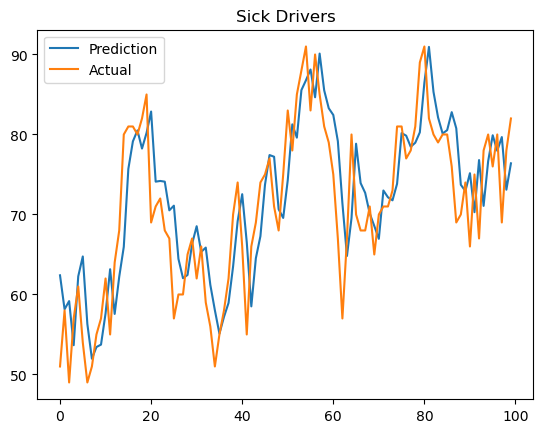

In [372]:
plot_predictions1(model, X_test1, y_test1)

# Predicting Available Drivers

In [362]:
WINDOW_SIZE = 7
X2, y2 = df_to_X_y(df_drivers_available, WINDOW_SIZE)
X2.shape, y2.shape

((1145, 7, 5), (1145, 1))

In [363]:
X_train2, y_train2 = X2[:916], y2[:916]
X_val2, y_val2 = X2[916:1031], y2[916:1031]
X_test2, y_test2 = X2[1031:], y2[1031:]
X_train2.shape, y_train2.shape, X_val2.shape, y_val2.shape, X_test2.shape, y_test2.shape

((916, 7, 5), (916, 1), (115, 7, 5), (115, 1), (114, 7, 5), (114, 1))

In [364]:
model2 = Sequential([
    InputLayer((7, 5)),
    Conv1D(32, kernel_size=2),
    Flatten(),
    Dense(8, activation='relu'),
    Dense(1, activation='linear')
])

model2.summary()

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_48 (Conv1D)          (None, 6, 32)             352       
                                                                 
 flatten_51 (Flatten)        (None, 192)               0         
                                                                 
 dense_102 (Dense)           (None, 8)                 1544      
                                                                 
 dense_103 (Dense)           (None, 1)                 9         
                                                                 
Total params: 1905 (7.44 KB)
Trainable params: 1905 (7.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [365]:
# Setting up model checkpoint to save the best model during training
# `save_best_only=True` ensures only the best model based on validation loss will be saved
cp = ModelCheckpoint('model2/', save_best_only=True)

# Compiling the model
from tensorflow.keras.optimizers import Adamax



model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
#model2.compile(loss=MeanSquaredError(), optimizer = Adamax(learning_rate=0.002, beta_1=0.9, beta_2=0.999), metrics=[RootMeanSquaredError()])

In [366]:
model2.fit(X_train2, y_train2, validation_data=(X_val2, y_val2), epochs=30, callbacks=[cp])

Epoch 1/30
26/29 [=========================>....] - ETA: 0s - loss: 2249798.2500 - root_mean_squared_error: 1499.9327INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


29/29 [==============================] - 2s 52ms/step - loss: 2220964.0000 - root_mean_squared_error: 1490.2899 - val_loss: 2095326.5000 - val_root_mean_squared_error: 1447.5243
Epoch 2/30
26/29 [=========================>....] - ETA: 0s - loss: 1641590.1250 - root_mean_squared_error: 1281.2455INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


29/29 [==============================] - 2s 57ms/step - loss: 1618297.2500 - root_mean_squared_error: 1272.1232 - val_loss: 1491375.8750 - val_root_mean_squared_error: 1221.2190
Epoch 3/30
24/29 [=======================>......] - ETA: 0s - loss: 1159311.6250 - root_mean_squared_error: 1076.7134INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


29/29 [==============================] - 1s 41ms/step - loss: 1127378.1250 - root_mean_squared_error: 1061.7806 - val_loss: 1013757.0000 - val_root_mean_squared_error: 1006.8550
Epoch 4/30
29/29 [==============================] - ETA: 0s - loss: 765822.1875 - root_mean_squared_error: 875.1127INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


29/29 [==============================] - 1s 39ms/step - loss: 765822.1875 - root_mean_squared_error: 875.1127 - val_loss: 685155.7500 - val_root_mean_squared_error: 827.7413
Epoch 5/30
29/29 [==============================] - ETA: 0s - loss: 504961.9688 - root_mean_squared_error: 710.6068INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


29/29 [==============================] - 1s 43ms/step - loss: 504961.9688 - root_mean_squared_error: 710.6068 - val_loss: 436764.6875 - val_root_mean_squared_error: 660.8818
Epoch 6/30
27/29 [==========================>...] - ETA: 0s - loss: 316790.6250 - root_mean_squared_error: 562.8416INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


29/29 [==============================] - 1s 43ms/step - loss: 312519.8750 - root_mean_squared_error: 559.0348 - val_loss: 259839.2656 - val_root_mean_squared_error: 509.7443
Epoch 7/30
18/29 [=================>............] - ETA: 0s - loss: 198839.7812 - root_mean_squared_error: 445.9146INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


29/29 [==============================] - 1s 45ms/step - loss: 179859.3750 - root_mean_squared_error: 424.0983 - val_loss: 142630.1719 - val_root_mean_squared_error: 377.6641
Epoch 8/30
27/29 [==========================>...] - ETA: 0s - loss: 96916.4453 - root_mean_squared_error: 311.3141 INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


29/29 [==============================] - 1s 40ms/step - loss: 95313.5000 - root_mean_squared_error: 308.7289 - val_loss: 71808.7891 - val_root_mean_squared_error: 267.9716
Epoch 9/30
15/29 [==============>...............] - ETA: 0s - loss: 54492.4414 - root_mean_squared_error: 233.4362INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


29/29 [==============================] - 1s 44ms/step - loss: 46245.2109 - root_mean_squared_error: 215.0470 - val_loss: 32976.2344 - val_root_mean_squared_error: 181.5936
Epoch 10/30
29/29 [==============================] - ETA: 0s - loss: 20470.5508 - root_mean_squared_error: 143.0753INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


29/29 [==============================] - 1s 48ms/step - loss: 20470.5508 - root_mean_squared_error: 143.0753 - val_loss: 13780.4492 - val_root_mean_squared_error: 117.3902
Epoch 11/30
29/29 [==============================] - ETA: 0s - loss: 8288.9521 - root_mean_squared_error: 91.0437  INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


29/29 [==============================] - 1s 41ms/step - loss: 8288.9521 - root_mean_squared_error: 91.0437 - val_loss: 5226.3262 - val_root_mean_squared_error: 72.2933
Epoch 12/30
14/29 [=============>................] - ETA: 0s - loss: 3808.8777 - root_mean_squared_error: 61.7161INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


29/29 [==============================] - 1s 40ms/step - loss: 3073.0742 - root_mean_squared_error: 55.4353 - val_loss: 1816.7847 - val_root_mean_squared_error: 42.6238
Epoch 13/30
24/29 [=======================>......] - ETA: 0s - loss: 1160.3254 - root_mean_squared_error: 34.0635INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


29/29 [==============================] - 1s 48ms/step - loss: 1071.2209 - root_mean_squared_error: 32.7295 - val_loss: 570.5930 - val_root_mean_squared_error: 23.8871
Epoch 14/30
28/29 [===========================>..] - ETA: 0s - loss: 370.3430 - root_mean_squared_error: 19.2443INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


29/29 [==============================] - 2s 57ms/step - loss: 365.4412 - root_mean_squared_error: 19.1165 - val_loss: 164.6818 - val_root_mean_squared_error: 12.8328
Epoch 15/30
25/29 [========================>.....] - ETA: 0s - loss: 154.5935 - root_mean_squared_error: 12.4336INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


29/29 [==============================] - 2s 53ms/step - loss: 142.0702 - root_mean_squared_error: 11.9193 - val_loss: 42.1914 - val_root_mean_squared_error: 6.4955
Epoch 16/30
16/29 [===============>..............] - ETA: 0s - loss: 93.3310 - root_mean_squared_error: 9.6608INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


29/29 [==============================] - 1s 46ms/step - loss: 75.6590 - root_mean_squared_error: 8.6982 - val_loss: 9.6121 - val_root_mean_squared_error: 3.1003
Epoch 17/30
24/29 [=======================>......] - ETA: 0s - loss: 52.9550 - root_mean_squared_error: 7.2770INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


29/29 [==============================] - 1s 45ms/step - loss: 57.6396 - root_mean_squared_error: 7.5921 - val_loss: 1.9194 - val_root_mean_squared_error: 1.3854
Epoch 18/30
15/29 [==============>...............] - ETA: 0s - loss: 86.0839 - root_mean_squared_error: 9.2781INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


29/29 [==============================] - 1s 39ms/step - loss: 53.3954 - root_mean_squared_error: 7.3072 - val_loss: 0.1901 - val_root_mean_squared_error: 0.4360
Epoch 19/30
29/29 [==============================] - ETA: 0s - loss: 52.2641 - root_mean_squared_error: 7.2294INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


29/29 [==============================] - 1s 46ms/step - loss: 52.2641 - root_mean_squared_error: 7.2294 - val_loss: 0.0134 - val_root_mean_squared_error: 0.1159
Epoch 20/30
29/29 [==============================] - 0s 5ms/step - loss: 52.0449 - root_mean_squared_error: 7.2142 - val_loss: 0.0218 - val_root_mean_squared_error: 0.1477
Epoch 21/30
29/29 [==============================] - 0s 5ms/step - loss: 52.0050 - root_mean_squared_error: 7.2115 - val_loss: 0.0712 - val_root_mean_squared_error: 0.2668
Epoch 22/30
29/29 [==============================] - 0s 6ms/step - loss: 52.0194 - root_mean_squared_error: 7.2124 - val_loss: 0.0939 - val_root_mean_squared_error: 0.3064
Epoch 23/30
29/29 [==============================] - 0s 10ms/step - loss: 51.9979 - root_mean_squared_error: 7.2110 - val_loss: 0.0708 - val_root_mean_squared_error: 0.2661
Epoch 24/30
29/29 [==============================] - 0s 7ms/step - loss: 52.0126 - root_mean_squared_error: 7.2120 - val_loss: 0.0707 - val_root_mean_

In [367]:
def plot_predictions2(model, X, y, start=0, end=100,):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions': predictions, 'Actuals':y.flatten()})
  plt.plot(df['Predictions'][start:end], label='Prediction')
  plt.plot(df['Actuals'][start:end], label='Actual')
  plt.title('On-duty Drivers Available')
  plt.legend()
  return df, mse(predictions, y)

4/4 [==============================] - 0s 3ms/step


(     Predictions  Actuals
 0    1900.493164   1900.0
 1    1900.500977   1900.0
 2    1900.508911   1900.0
 3    1900.517090   1900.0
 4    1900.525146   1900.0
 ..           ...      ...
 109  1901.119141   1900.0
 110  1901.119019   1900.0
 111  1901.118774   1900.0
 112  1901.118652   1900.0
 113  1901.118164   1900.0
 
 [114 rows x 2 columns],
 0.8307889929988928)

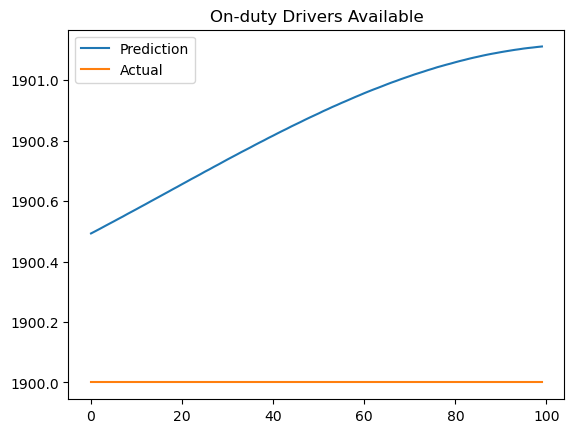

In [368]:
plot_predictions2(model2, X_test2, y_test2)

4/4 [==============================] - 0s 3ms/step


(     Predictions  Actuals
 0    1900.276367   1900.0
 1    1900.270996   1900.0
 2    1900.265503   1900.0
 3    1900.260498   1900.0
 4    1900.255249   1900.0
 ..           ...      ...
 110  1900.454346   1900.0
 111  1900.461914   1900.0
 112  1900.469727   1900.0
 113  1900.477783   1900.0
 114  1900.485596   1900.0
 
 [115 rows x 2 columns],
 0.06934440252573594)

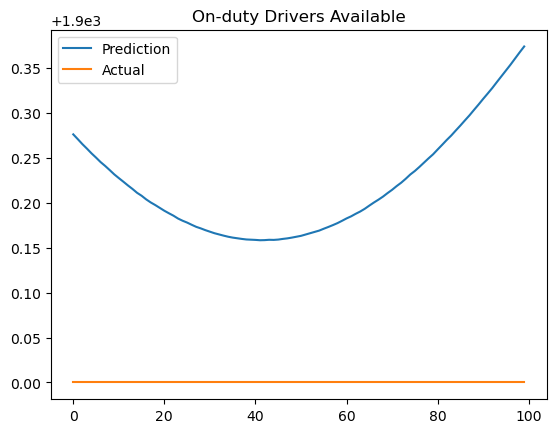

In [369]:
plot_predictions1(model2, X_val2, y_val2)

29/29 [==============================] - 0s 3ms/step


(     Predictions  Actuals
 0    1700.954346   1700.0
 1    1700.959961   1700.0
 2    1700.965332   1700.0
 3    1700.971069   1700.0
 4    1700.976440   1700.0
 ..           ...      ...
 911  1900.304199   1900.0
 912  1900.298584   1900.0
 913  1900.292969   1900.0
 914  1900.287109   1900.0
 915  1900.281738   1900.0
 
 [916 rows x 2 columns],
 51.980569043566824)

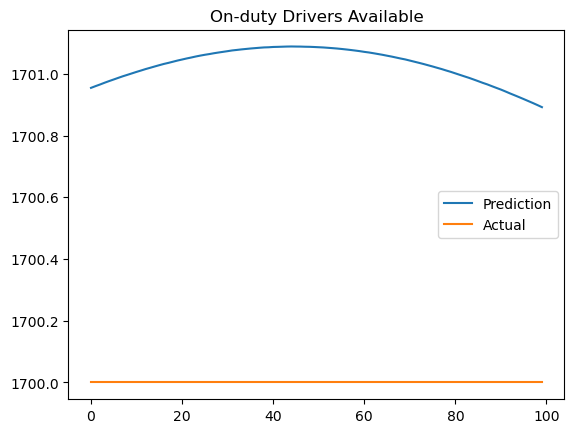

In [370]:
plot_predictions1(model2, X_train2, y_train2)